In [1]:
from numpy import exp, log as ln
from numpy.fft import fft2,  fftfreq, fftshift, ifftshift, rfftfreq
from scipy.optimize import curve_fit

from SFS.src.py.utils import *

In [2]:
number = 5
folder = "data/SETD_paper/{number}/".format(number = number)
time = get_time(folder + "1/")
n = count_files(folder)

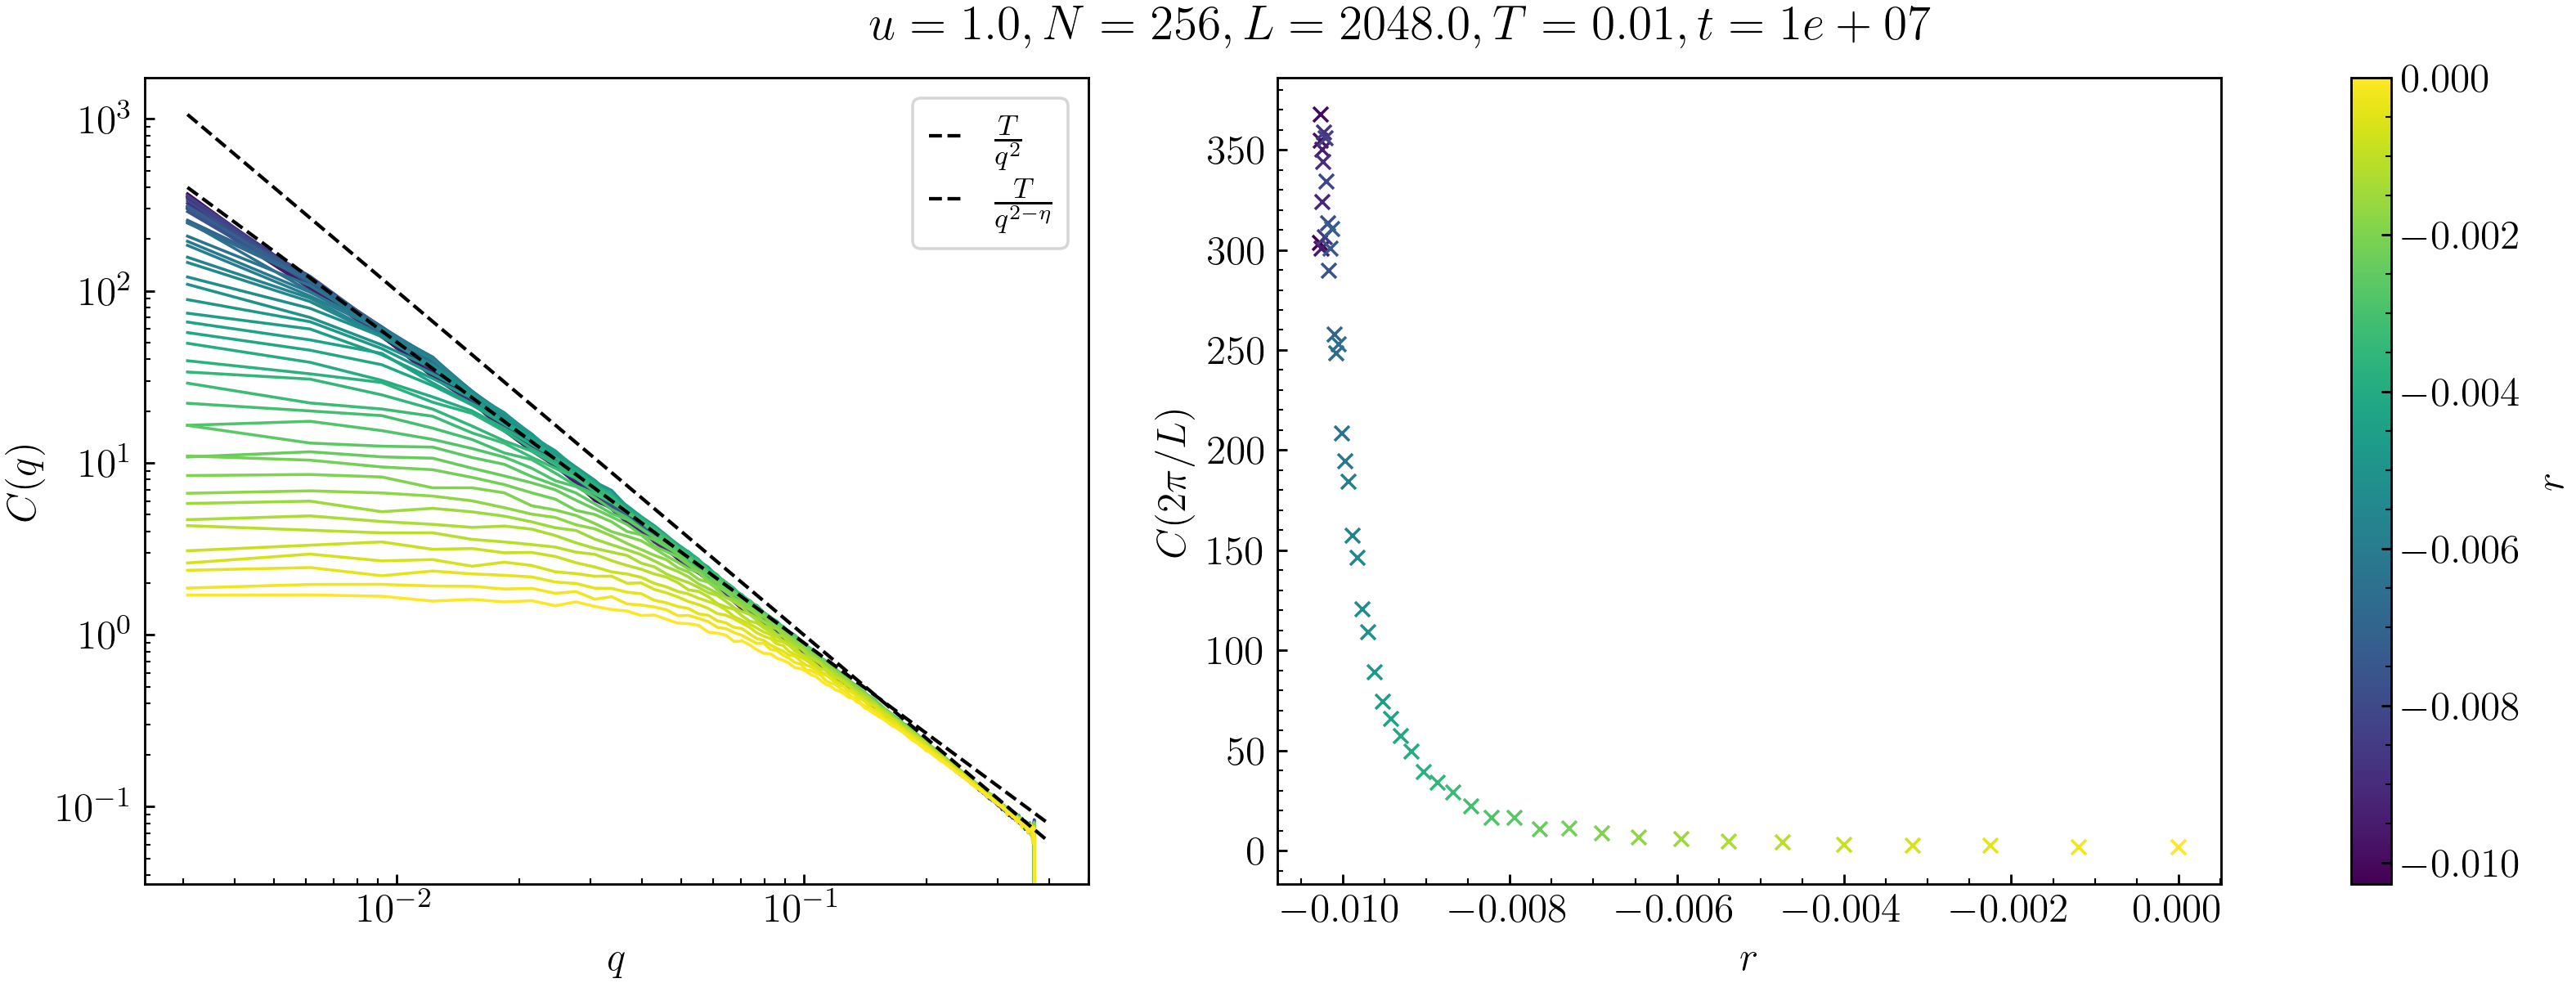

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
av      = 75
skip    = 1
n       = 48
indx    = range(0, n, skip)

rr  = []
for i in indx:
    q0, Cq, con, T, L, N, dt = get_Cq_saved(folder, seed=i+1)
    assert av <= np.shape(Cq)[0], "{i}".format(i=i)
    Cq = np.mean(np.abs(Cq[-av:None, :]), axis=0)
    rr.append(con["r"])
    color = cm.viridis(i/(n-1))
    ax[0].loglog(q0[1:], Cq[1:, 0, 0], lw=1., ls="-", color=color, zorder=0)
    ax[1].plot(rr[-1], Cq[1, 0, 0], 'x', color=color)

ax[0].plot(q0[1:], T*q0[1:]**(-2), 'k--', label="$\\frac{T}{q^2}$")
ax[0].plot(q0[1:], 1.6*T*q0[1:]**(-1.75), 'k--', label="$\\frac{T}{q^{2-\\eta}}$")

ax[0].legend()
ax[0].set_xlabel("$q$")
ax[0].set_ylabel("$C(q)$")
ax[1].set_xlabel("$r$")
ax[1].set_ylabel("$C(2\\pi/L)$")
fig.suptitle("$u = {u}, N = {N}, L = {L}, T={T}, t={t:1.0e} $".format(u=con["u"],N=N,L=L, T=T,t=time[-1]), y=.95)
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.min(rr), vmax=np.max(rr)), cmap=cm.viridis), ax=ax, label="$r$")

# Correlation Length

Could not fit 10


/tmp/ipykernel_4029106/3433187067.py:6: RuntimeWarning: invalid value encountered in power
  lnf = lambda q, A, B, xi : ln(A / (1 + (q * xi)**B))


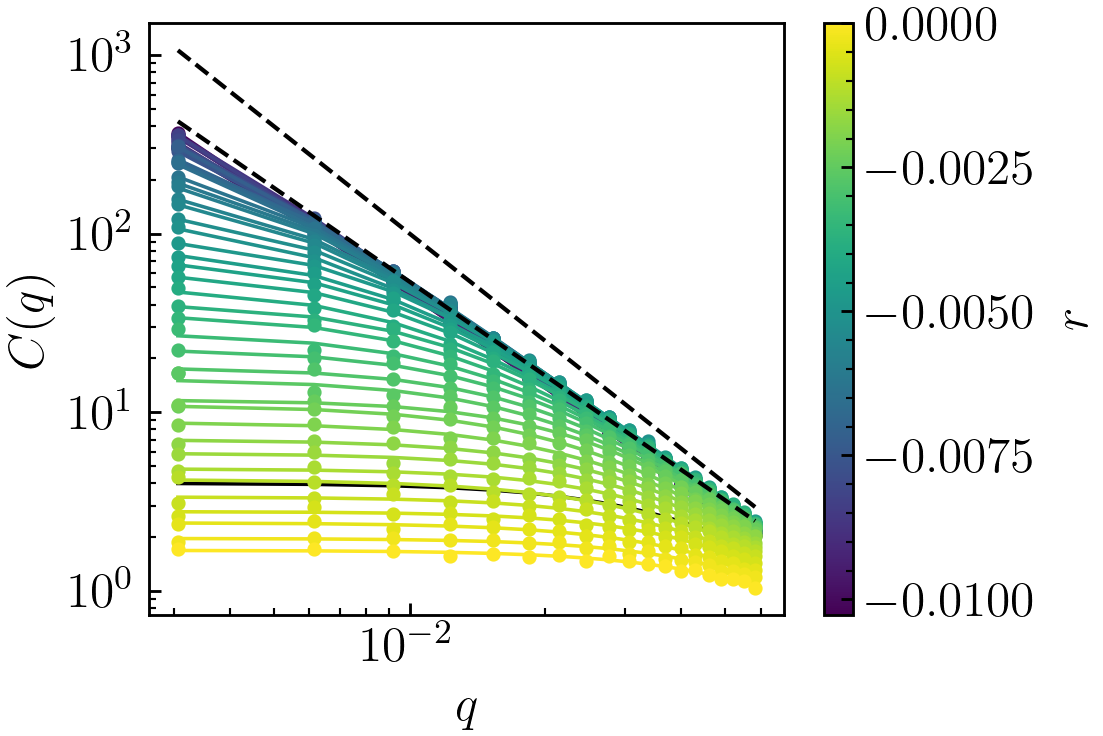

In [4]:
fig, ax = plt.subplots(figsize=(4,3))

q0, Cq, con, T, L, N, dt = get_Cq_saved(folder, seed=1)
XI = 20
p0 = (T*XI**2, 2, XI)
lnf = lambda q, A, B, xi : ln(A / (1 + (q * xi)**B))
rs, As, Bs, xi = [], [], [], []

(s, e) = (1, 20)

ax.plot(q0[s:e], T*q0[s:e]**(-2), 'k--', label="$\\frac{T}{q^2}$")
ax.plot(q0[s:e], 1.7*T*q0[s:e]**(-1.75), 'k--', label="$\\frac{T}{q^{2-\\nu}}$", zorder=10)
ax.loglog(q0[s:e], exp(lnf(q0[s:e], *p0)), color='black', lw=1.)

for i in indx:
    q0, Cq, con, T, L, N, dt = get_Cq_saved(folder, seed=i+1)
    assert av <= np.shape(Cq)[0]
    Cq = np.mean(np.abs(Cq[-av:None, :]), axis=0)[:, 0, 0]
    Cq, q0 = Cq[s:e], q0[s:e]

    color = cm.viridis(i/(n-1)) 
    ax.loglog(q0, Cq, 'o', ms=3, color=color)
    try: p = curve_fit(lnf, q0, np.log(Cq), p0=p0, ftol=1e-20, xtol=1e-10)
    except: print("Could not fit {i}".format(i=i)); continue

    rs.append(con["r"]); As.append(p[0][0]); Bs.append(p[0][1]); xi.append(p[0][2])
    ax.loglog(q0, exp(lnf(q0, *p[0])), color=color, lw=1.)

ax.set_ylabel("$C(q)$")
ax.set_xlabel("$q$")
fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=np.min(rs), vmax=np.max(rs)), cmap=cm.viridis), ax=ax, label="$r$",)

rs, xi, As, Bs = np.array(rs), np.array(xi), np.array(As), np.array(Bs)
rs, xi, As, Bs = rs[::-1], xi[::-1], As[::-1], Bs[::-1]

<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:30: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\c'
<>:30: SyntaxWarning: invalid escape sequence '\{'
/tmp/ipykernel_4029106/1702085288.py:4: SyntaxWarning: invalid escape sequence '\c'
  style2 = dict(label="$A_c$", color="purple", marker="$\circ$", linestyle="", ms=10, zorder=11)
/tmp/ipykernel_4029106/1702085288.py:30: SyntaxWarning: invalid escape sequence '\{'
  fig0.suptitle("$C(q; r) = A(r) \{1 + [\\xi(r) q]^{ B(r) }\}^{-1}$")


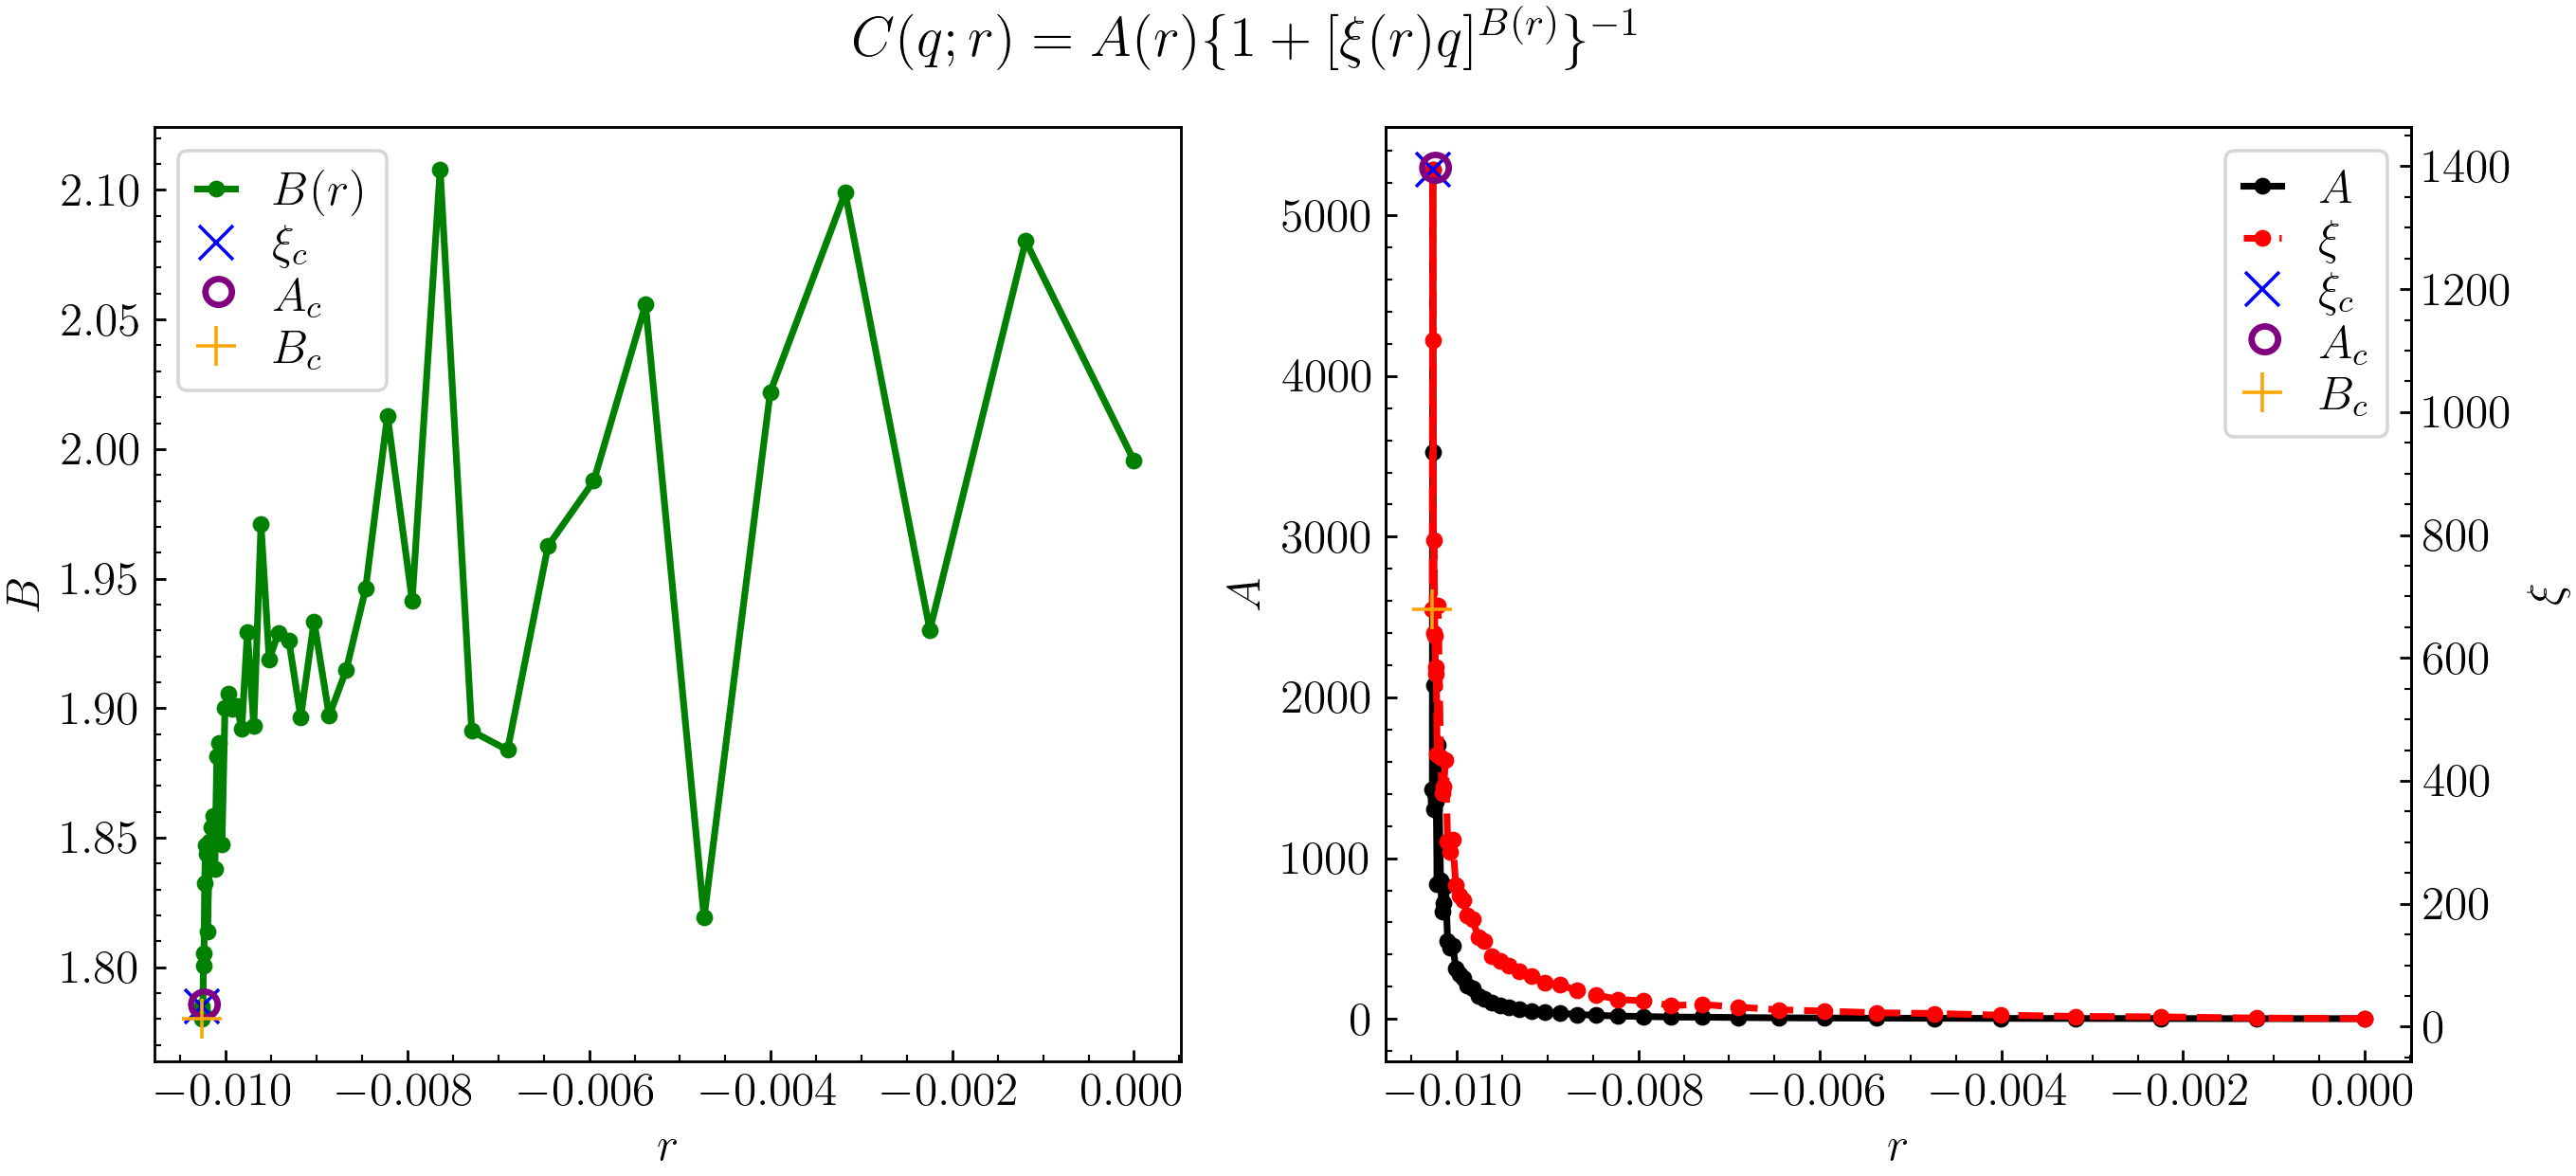

In [5]:
xi_c, B_c, A_c = np.argmax(xi), np.argmin(Bs), np.argmax(As)

style1 = dict(label="$\\xi_c$", color="blue", marker="x", linestyle="", ms=10, zorder=10)
style2 = dict(label="$A_c$", color="purple", marker="$\circ$", linestyle="", ms=10, zorder=11)
style3 = dict(label="$B_c$",color="orange", marker="+",  linestyle="", ms=12, zorder=12)

fig0, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,5))
ax2 = ax1.twinx()

ax0.plot(rs, Bs, ".-", color="g", label="$B(r)$", lw=2, ms=8)
ax0.plot(rs[xi_c], Bs[xi_c], **style1)
ax0.plot(rs[A_c], Bs[A_c], **style2)
ax0.plot(rs[B_c], Bs[B_c], **style3)

ax1.plot(rs, As, 'k-', marker=".", lw=2, ms=8, label = "$A$", zorder=1)
ax2.plot(rs, xi, 'r--', marker=".", lw=2, ms=8, label="$\\xi$", zorder=1)
ax2.plot(rs[xi_c], xi[xi_c],**style1)
ax2.plot(rs[A_c], xi[A_c],  **style2)
ax2.plot(rs[B_c], xi[B_c],  **style3)

ax0.set_ylabel("$B$")
ax0.set_xlabel("$r$")
ax1.set_ylabel("$A$")
ax2.set_ylabel("$\\xi$")
ax1.set_xlabel("$r$")
ax0.legend()
lines2, labels2 = ax1.get_legend_handles_labels()
lines1, labels1 = ax2.get_legend_handles_labels()
ax1.legend(lines2+lines1, labels2+labels1, loc=1)
fig0.suptitle("$C(q; r) = A(r) \{1 + [\\xi(r) q]^{ B(r) }\}^{-1}$")

plt.show()

In [6]:
alpha   = 0.7
ms      = 6
lw      = 2
l1      = 0.5
l2      = 0.1

def fit(x, y, rc=0, pa=1, mm=None, nn=0, sgn=1, ax1=None, ax2=None):
    if mm+1 == 0: mm = None 
    else: mm = mm+1
    xx, yy = x[nn:mm], y[nn:mm]
    a, b = exp(np.min(yy)), exp(np.max(yy))
    f = lambda X, a, b : a * X + b
    p, pcov = curve_fit(f, xx, yy)
    err = np.sqrt(np.sum( ((f(xx, *p) - yy) / yy)**2 )) / len(yy)

    if ax1 is not None: plot_log(ax1, x, y, xx, yy, p, f, rc, pa)
    if ax2 is not None: plot_lin(ax2, x, y, xx, yy, p, f, rc, pa, sgn)

    return err

def plot_log(ax1, x, y, xx, yy, p, f, rc, pa):        
    if pa: ax1.loglog(exp(x), exp(y), 'o', ms=ms, color="gray")
    ax1.loglog(exp(xx), exp(yy), 'o', ms=ms, color="tab:blue")
    if pa:  X = np.linspace(np.min(x) - l1, np.max(x) + l1)
    else:   X = np.linspace(np.min(xx) - l1, np.max(xx) + l1)
    ax1.loglog(exp(X), exp(f(X, *p)), 'k--', lw=lw, label="${:.2f}x+c$".format(p[0]), alpha=alpha)

def plot_lin(ax2, x, y, xx, yy, p, f, rc, pa, sgn=1):
    if pa: ax2.plot(sgn*exp(x) + rc, exp(y), 'o', ms=ms, color='gray')
    ax2.plot(sgn*exp(xx) + rc , exp(yy), 'o', ms=ms, color="tab:blue")
    if pa:  X = np.linspace(np.min(x) - l2, np.max(x) + l2)
    else:   X = np.linspace(np.min(xx) - l2, np.max(xx) + l2)
    ax2.plot(sgn*exp(X) + rc, exp(f(X, *p)), '--', lw=lw, color='k', zorder=10)
    ax2.plot([rc, rc], [np.min(exp(f(X, *p))), np.max(exp(f(X, *p)))], '--', color='k')


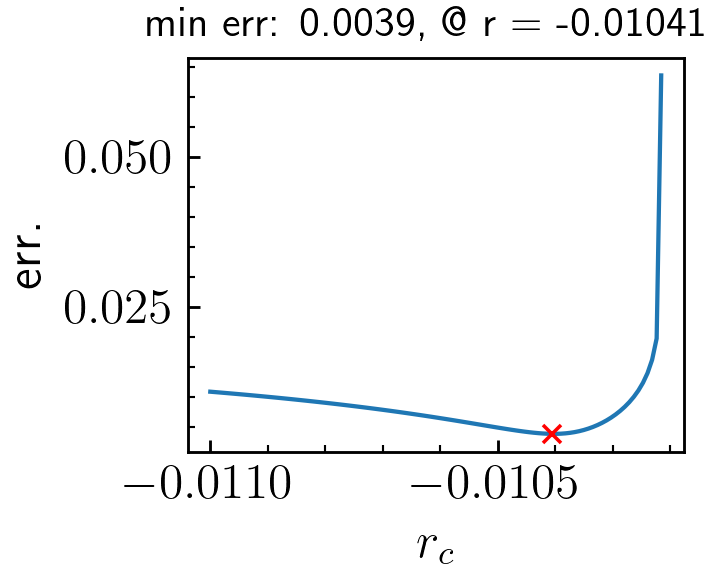

In [7]:
mm  = xi_c - 7
nn  = 10

rcs = np.linspace(rs[mm]-1e-15, -0.011, 100)

errs = []
for rc in rcs:
    lnr = ln(np.abs(rs-rc))
    lnx = ln(xi)
    lnA = ln(As)

    err1 = fit(lnr, lnx, rc=rc, mm=mm, nn=nn)
    err2 = fit(lnr, lnA, rc=rc, mm=mm, nn=nn)
    _ = fit(lnx, lnA, rc=rc, mm=mm, nn=nn)
    
    erri = np.array([err1, err2]) # Only 1 and 2 depend on r_c
    errs.append(np.sqrt(np.sum(err2**2)))

errs = np.array(errs)

fig, ax = plt.subplots(figsize=(2.5, 2))
ax.plot(rcs, errs)
i0 = np.argmin(errs)
ax.plot(rcs[i0] , errs[i0], 'rx')

err_title = "min err: {err:.4f}, @ r = {r:1.5f}".format(err=errs[i0], r=rcs[i0])
fig.suptitle(err_title, fontsize=12)
ax.set_xlabel("$r_c$")
ax.set_ylabel("err.")

plt.show()

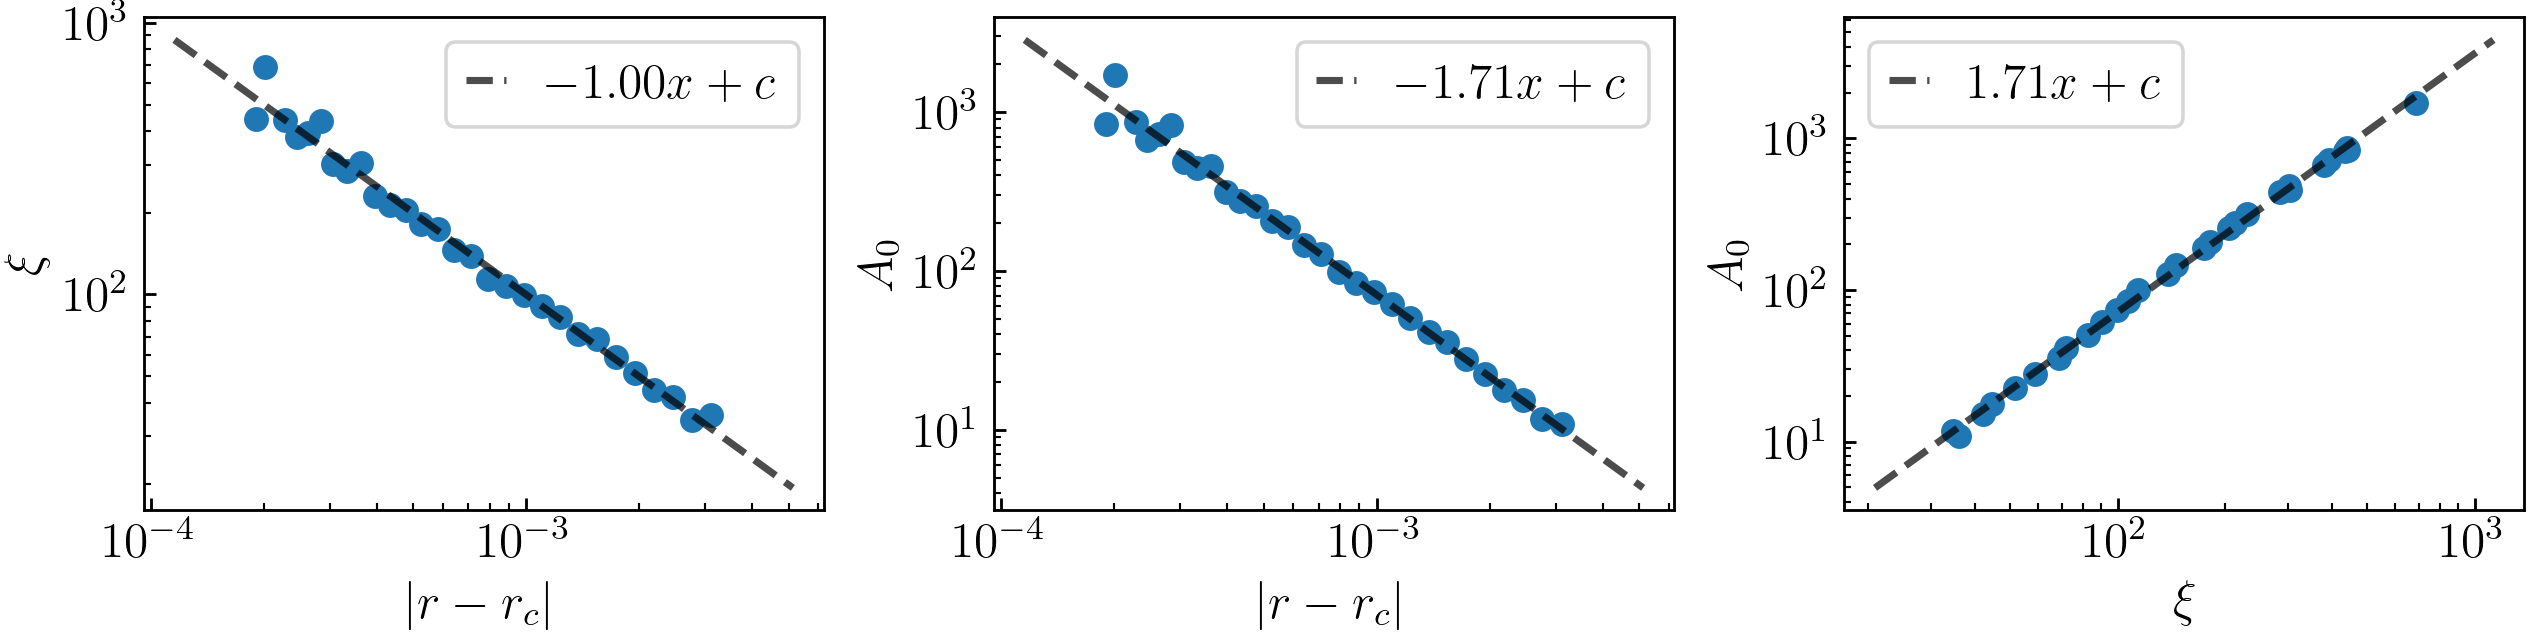

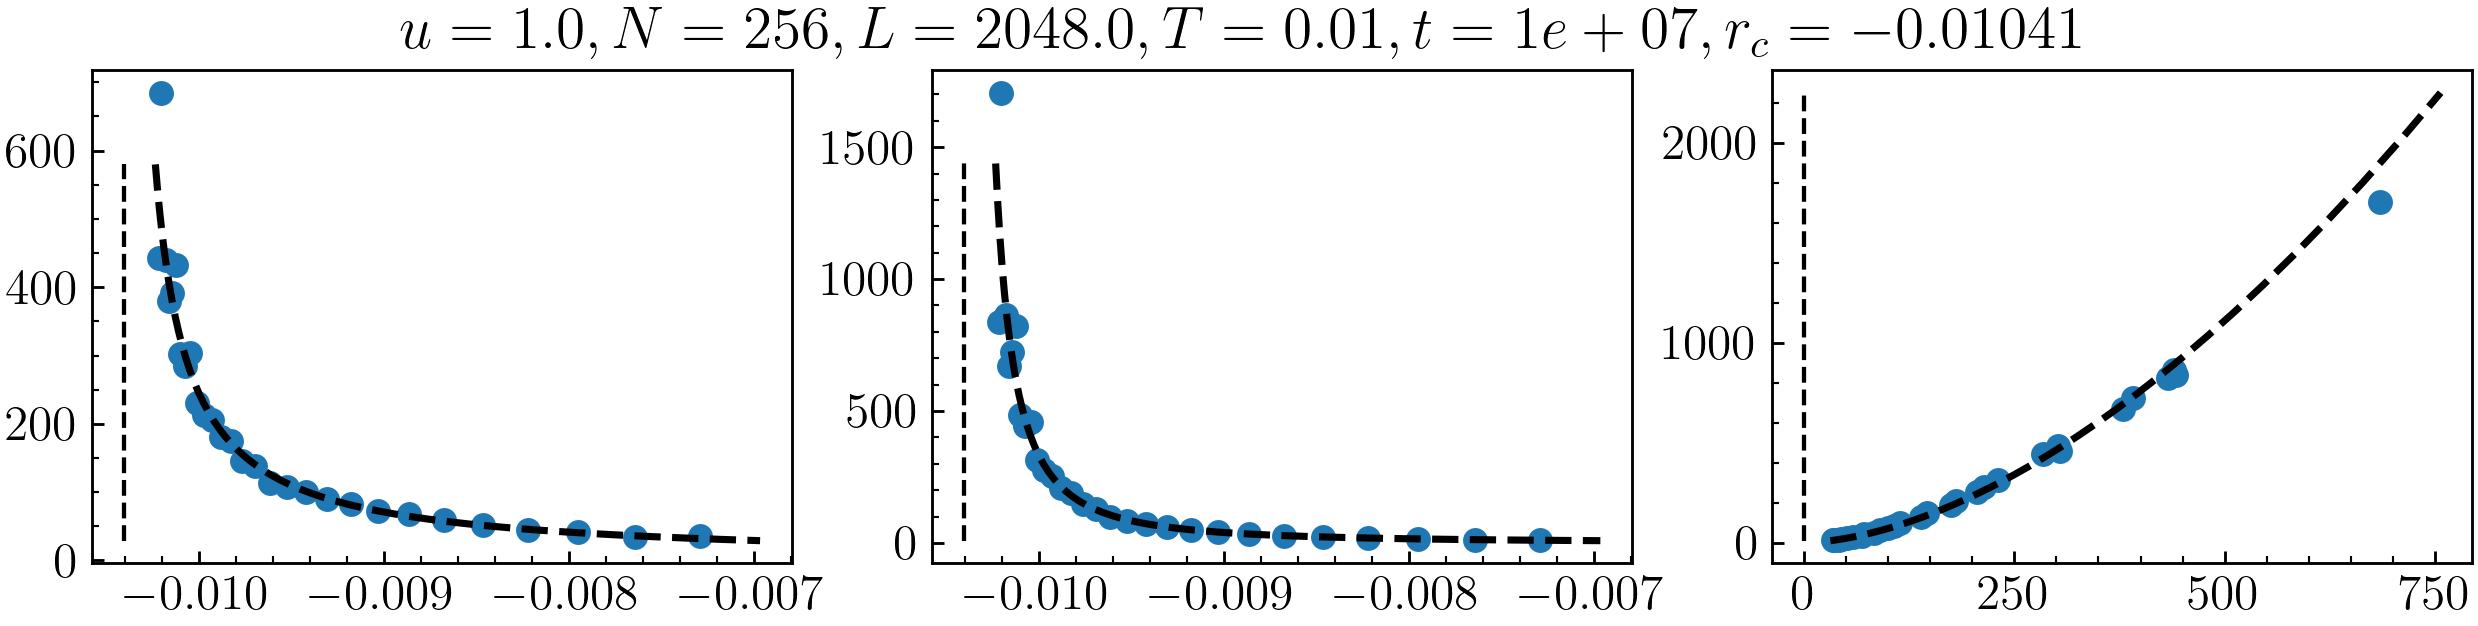

In [8]:
fig0, ax0 = plt.subplots(1, 3, figsize=(12, 2.5))
fig2, ax2 = plt.subplots(1, 3, figsize=(12, 2.5))

pa      = 0
rc      = rcs[i0]
lnr     = ln(np.abs(rs-rc))
lnxi    = ln(xi)
lnA     = ln(As)

fit(lnr, lnxi, rc=rc, mm=mm, nn=nn, pa=pa, ax1=ax0[0], ax2=ax2[0])
fit(lnr, lnA,  rc=rc, mm=mm, nn=nn, pa=pa, ax1=ax0[1], ax2=ax2[1])
fit(lnxi, lnA, rc=rc, mm=mm, nn=nn, pa=pa, ax1=ax0[2], ax2=ax2[2])

ax0[0].set_xlabel("$|r - r_c|$")
ax0[0].set_ylabel("$\\xi$")
ax0[1].set_xlabel("$|r - r_c|$")
ax0[1].set_ylabel("$A_0$")
ax0[2].set_xlabel("$\\xi$")
ax0[2].set_ylabel("$A_0$")

for ax in ax0:
    ax.xaxis.set_minor_formatter(plt.NullFormatter())
    ax.yaxis.set_minor_formatter(plt.NullFormatter())
    ax.tick_params(direction='in')
    ax.tick_params(direction='in', which="minor")
    ax.legend()

title = "$u = {u}, N = {N}, L = {L}, T={T}, t={t:1.0e}, r_c={rc:1.5f} $".format(u=con["u"],N=N,L=L, T=T,t=time[-1], rc=rc)
fig2.suptitle(title)
fig0.subplots_adjust(wspace=0.25)
fig0.savefig("fig/figexp.pdf")

/tmp/ipykernel_4029106/3433187067.py:6: RuntimeWarning: invalid value encountered in power
  lnf = lambda q, A, B, xi : ln(A / (1 + (q * xi)**B))


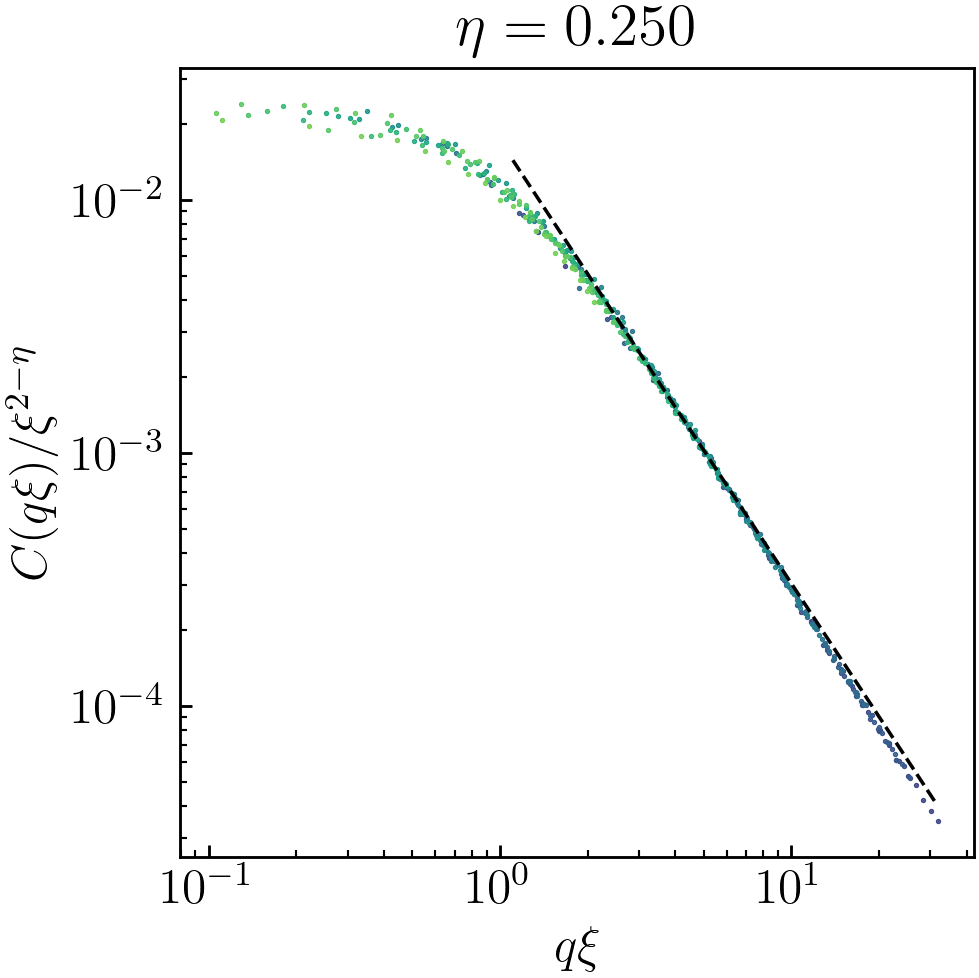

In [9]:
Cs, XIs = [], []
indx = [i for i in range(n-(mm), n-(nn), skip)]

for i in indx:
    seed = i + 1
    q0, Cq, con, T, L, N, dt = get_Cq_saved(folder, seed=i+1)
    assert av <= np.shape(Cq)[0]
    Cq = np.mean(np.abs(Cq[-av:None, :, 0, 0]), axis=0)
    Cq, q0 = Cq[s:e], q0[s:e]
    try: p = curve_fit(lnf, q0, ln(Cq), p0=p0)
    except: print("Could not fit {i}".format(i=i)); contietae
    Cs.append(np.copy(Cq))
    XIs.append(p[0][2])


fig, ax = plt.subplots(figsize=(4,4))

eta = .25
for i in range(len(Cs)):
    color = cm.viridis(indx[i]/(n-1))
    Cq, XI = Cs[i], XIs[i]
    ax.loglog(q0 *XI, Cq * XI**(-(2-eta)), ".", ms=1, color=color)

ii = np.argmax(XIs)
jj = -1 # which point to interesect 
MAXQ = q0[jj]*XIs[ii]
MINQ = q0[0]*XIs[-1] * 10
q = 10**np.linspace(np.log10(MINQ), np.log10(MAXQ))
F0 = Cs[ii][jj]*XIs[ii]**(-(2-eta)) / q[-1]**(-(2-eta)) * 1.15
ax.loglog(q, q**(-(2-eta)) * F0, "--", ms=1, lw=1., color="black", alpha=1)
ax.set_xlabel("$q \\xi$")
ax.set_ylabel("$C(q \\xi ) /  \\xi^{2 - \\eta}$")
ax.set_title("$\\eta = {eta:.3f}$".format(eta=eta))
plt.show()